# 1. Preparation
## 1.1 Used Libraries

In [ ]:
# import any necessery libraries here 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns

## 1.2 Loading Dataset
Resource: [New York Ciity Airbnb Open Data](https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data)

In [ ]:
data = pd.read_csv('data/AB_NYC_2019.csv')
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


# 2. Data Analysis
## 2.1 Basic understandings of dataset

In [ ]:
print('Number of rows in this dataset: ', len(data))
print('Data types of every column in the dataset')
print(data.dtypes)

Number of rows in this dataset:  48895
Data types of every column in the dataset
id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object


### 2.1.1. Data cleaning


In [ ]:
# First, let's see if there's any missing values for each column 
data.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [ ]:
# since we won't need id, host_name, last_review for our purpose of this project, let's drop those columns
data.drop(['id', 'host_name', 'last_review'], axis=1, inplace=True)

In [ ]:
# replace all NaN values in 'reviews_per_month' with 0 
data.fillna({'reviews_per_month':0}, inplace=True)
data.isnull().sum()

name                              16
host_id                            0
neighbourhood_group                0
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
price                              0
minimum_nights                     0
number_of_reviews                  0
reviews_per_month                  0
calculated_host_listings_count     0
availability_365                   0
dtype: int64

In [ ]:
# remove duplicates if any
data.duplicated().sum()
data.drop_duplicates(inplace=True)

### 2.1.2 Summary of numeric data

In [ ]:
data.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.090910,7.143982,112.781327
std,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.597283,32.952519,131.622289
min,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


### 2.1.3 Unique values for `neighbourhood_group`, `neighbourhood`, `room_type`

In [ ]:
# categories for neighbourhood_group
print('Total number of neighbourhood_group: ', len(data.neighbourhood_group.unique()))
data.neighbourhood_group.unique()

Total number of neighbourhood_group:  5


array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [ ]:
# categories for neighbourhood
print('Total number of neighbourhood: ', len(data.neighbourhood.unique()))
print('and some of categories', data.neighbourhood.unique()[:10])

Total number of neighbourhood:  221
and some of categories ['Kensington' 'Midtown' 'Harlem' 'Clinton Hill' 'East Harlem'
 'Murray Hill' 'Bedford-Stuyvesant' "Hell's Kitchen" 'Upper West Side'
 'Chinatown']


In [ ]:
# categories for room_type
print('Total number of room_type: ', len(data.room_type.unique()))
data.room_type.unique()

Total number of room_type:  3


array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

### 2.1.4 Correlation between different variables

Index(['name', 'host_id', 'neighbourhood_group', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

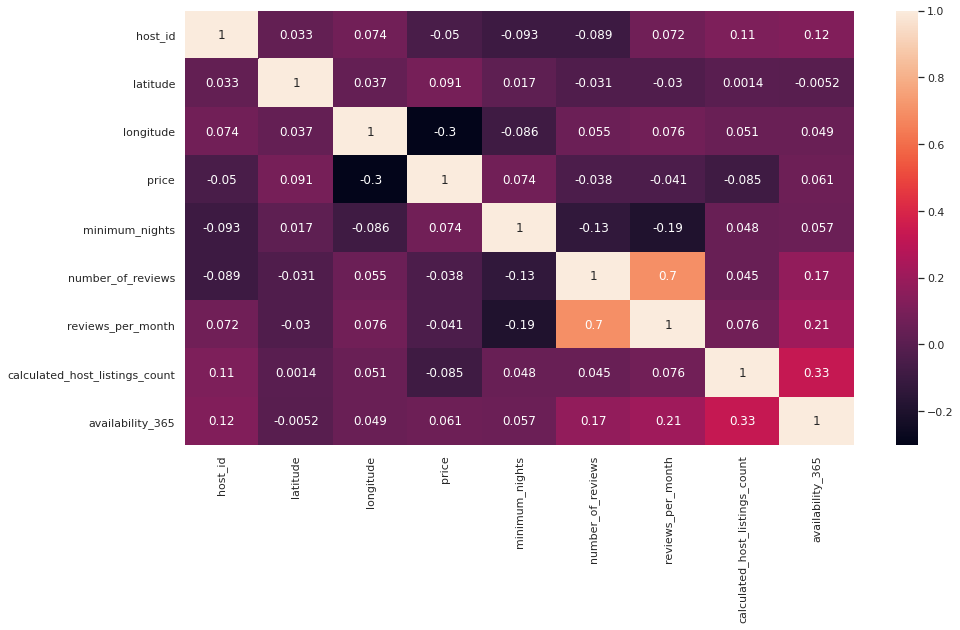

In [ ]:
corr = data.corr(method='kendall')
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)
data.columns

## 2.2 Learn about __hosts__
### 2.2.1 What hosts have the most listings on Airbnb?

In [ ]:
top_10_hosts = data.host_id.value_counts().head(10)
top_10_hosts

219517861    327
107434423    232
30283594     121
137358866    103
12243051      96
16098958      96
61391963      91
22541573      87
200380610     65
7503643       52
Name: host_id, dtype: int64

[Text(0, 0, '7503643'),
 Text(0, 0, '12243051'),
 Text(0, 0, '16098958'),
 Text(0, 0, '22541573'),
 Text(0, 0, '30283594'),
 Text(0, 0, '61391963'),
 Text(0, 0, '107434423'),
 Text(0, 0, '137358866'),
 Text(0, 0, '200380610'),
 Text(0, 0, '219517861')]

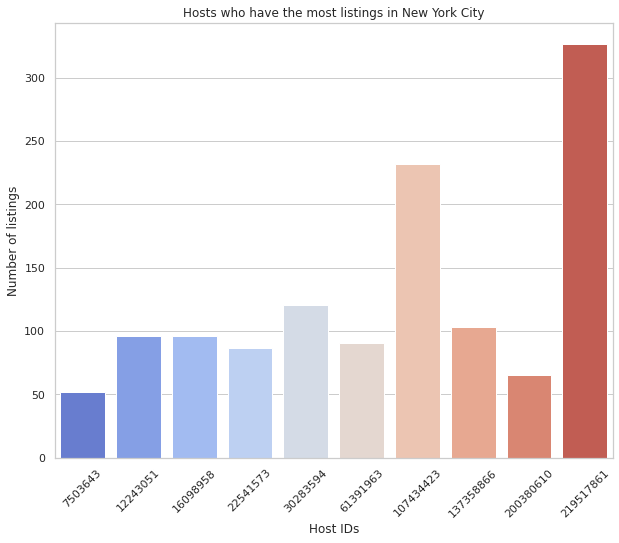

In [ ]:
# visualization
sns.set(rc={'figure.figsize': (10, 8)})
sns.set_style('whitegrid')
top_10_hosts_df = pd.DataFrame(top_10_hosts)
top_10_hosts_df.reset_index(inplace=True)
top_10_hosts_df.rename(columns={'index': 'Host_ID', 'host_id': 'P_Count'}, inplace=True)

top_10_hosts_plot = sns.barplot(x='Host_ID', y='P_Count', data=top_10_hosts_df, palette='coolwarm')
top_10_hosts_plot.set_title('Hosts who have the most listings in New York City')
top_10_hosts_plot.set_ylabel('Number of listings')
top_10_hosts_plot.set_xlabel('Host IDs')
top_10_hosts_plot.set_xticklabels(top_10_hosts_plot.get_xticklabels(), rotation=45)

## 2.3 Learn about __neighborhood__
### 2.3.1 Neighborhood group - how many listings are there for each area? 

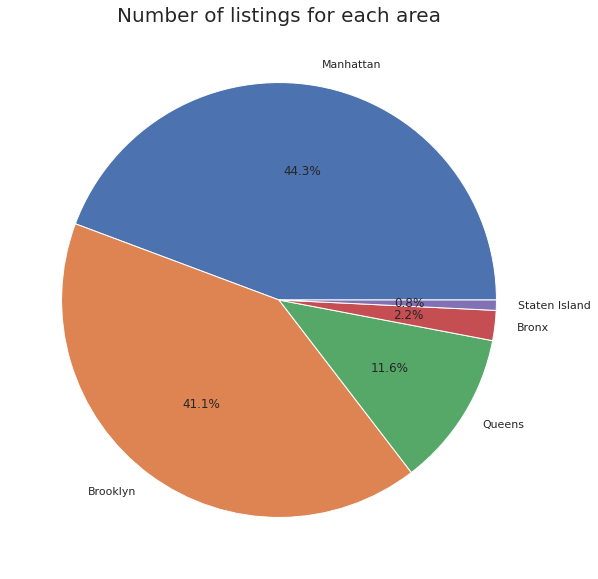

In [ ]:
labels = data.neighbourhood_group.value_counts().index
explode = [0,0,0,0,0]
sizes = data.neighbourhood_group.value_counts().values
plt.figure(0, figsize= (10, 10))
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%')
plt.title('Number of listings for each area', fontsize=20)
plt.show()

### 2.3.2 Neighborhood group - what's average price on each room type for each neighborhood area?

Text(0.5, 0, 'Neighborhood group')

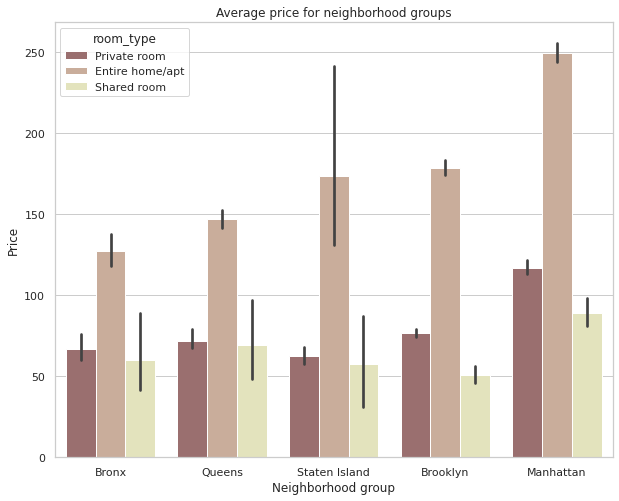

In [ ]:
neighborhood_group_price = data.groupby(['neighbourhood_group'])['price'].aggregate(np.mean).reset_index().sort_values('price')
neighborhood_group_price_plot = sns.barplot(x='neighbourhood_group', y="price", hue='room_type', data=data, order=neighborhood_group_price['neighbourhood_group'], palette='pink')
neighborhood_group_price_plot.set_title('Average price for neighborhood groups')
neighborhood_group_price_plot.set_ylabel('Price')
neighborhood_group_price_plot.set_xlabel('Neighborhood group')

### 2.3.3 Neighborhood Group - what's relation between neighborhood group and room availability?

Text(0.5, 0, 'Neighborhood group')

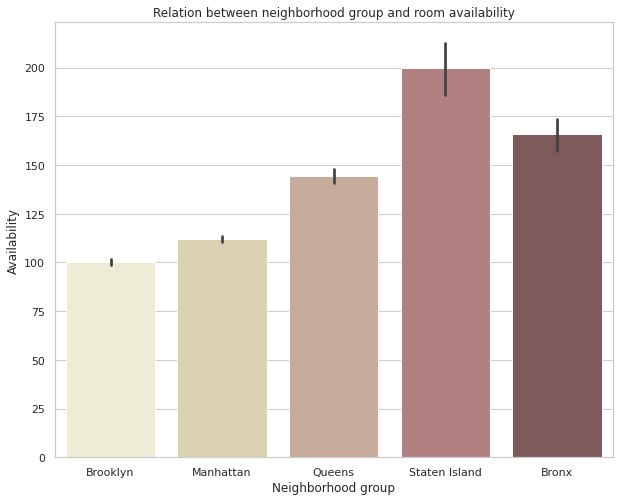

In [ ]:
neighborhood_group_availability_plot = sns.barplot(data=data, x='neighbourhood_group', y='availability_365', palette='pink_r')
neighborhood_group_availability_plot.set_title('Relation between neighborhood group and room availability')
neighborhood_group_availability_plot.set_ylabel('Availability')
neighborhood_group_availability_plot.set_xlabel('Neighborhood group')

### 2.3.4 Neighborhood - what are top 10 neighborhood on number of listings? 

In [ ]:
top_10_neighborhood = data.neighbourhood.value_counts().head(10)
top_10_neighborhood

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
Hell's Kitchen        1958
East Village          1853
Upper East Side       1798
Crown Heights         1564
Midtown               1545
Name: neighbourhood, dtype: int64

Text(0.5, 0, 'Neighborhood')

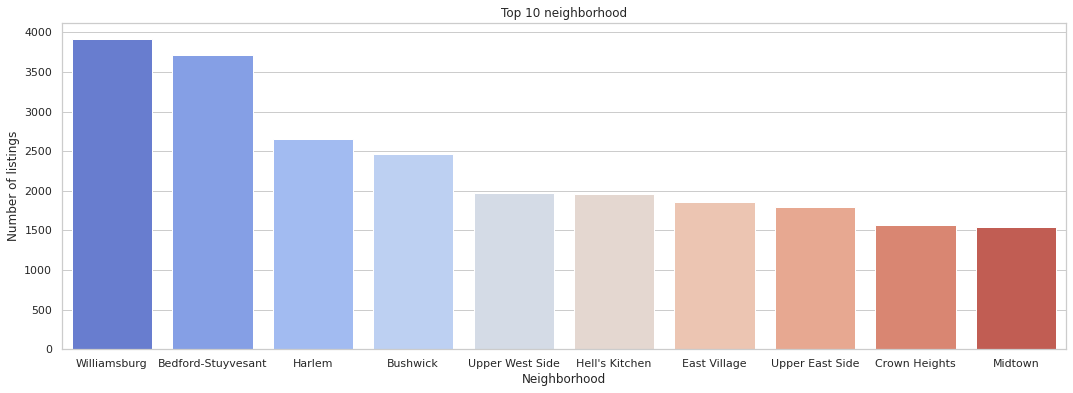

In [ ]:
sns.set(rc={'figure.figsize': (18, 6)})
sns.set_style('whitegrid')
top_10_neighborhood_df = pd.DataFrame(top_10_neighborhood)
top_10_neighborhood_df.reset_index(inplace=True)
top_10_neighborhood_df.rename(columns={'index': 'Neighbourhood', 'neighbourhood': 'Count'}, inplace=True)
top_10_neighborhood_df

top_10_neighborhood_plot = sns.barplot(x='Neighbourhood', y='Count', data=top_10_neighborhood_df, palette='coolwarm')
top_10_neighborhood_plot.set_title('Top 10 neighborhood')
top_10_neighborhood_plot.set_ylabel('Number of listings')
top_10_neighborhood_plot.set_xlabel('Neighborhood')

### 2.3.5 Neighborhood - which neighbors have expensive prices?

Text(0.5, 0, 'Neighborhood')

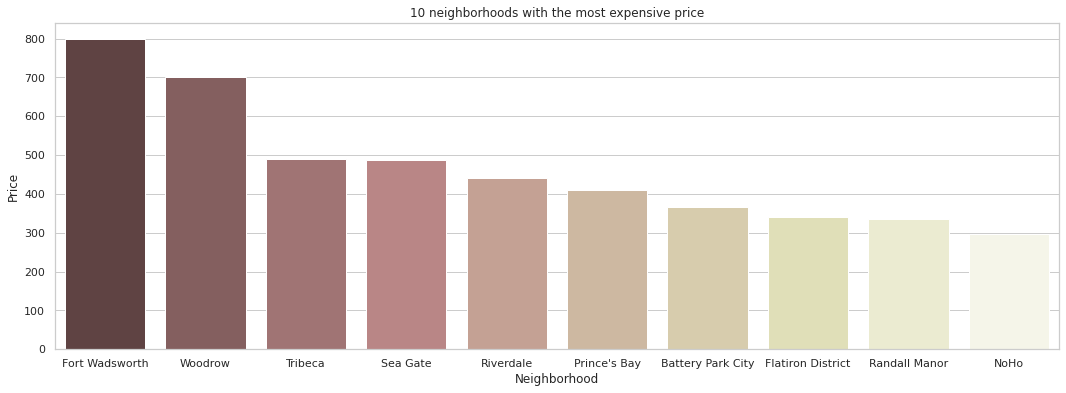

In [ ]:
neighborhood_price = data.groupby(['neighbourhood'])['price'].aggregate(np.mean).reset_index().sort_values('price')
top_10_neighborhood_price_df = neighborhood_price.reindex(neighborhood_price.index[::-1])[:10]

top_10_neighborhood_plot = sns.barplot(x='neighbourhood', y='price', data=top_10_neighborhood_price_df, palette='pink')
top_10_neighborhood_plot.set_title('10 neighborhoods with the most expensive price')
top_10_neighborhood_plot.set_ylabel('Price')
top_10_neighborhood_plot.set_xlabel('Neighborhood')

### 2.3.5 Neighborhood - which neighbors have cheapest prices?

Text(0.5, 0, 'Neighborhood')

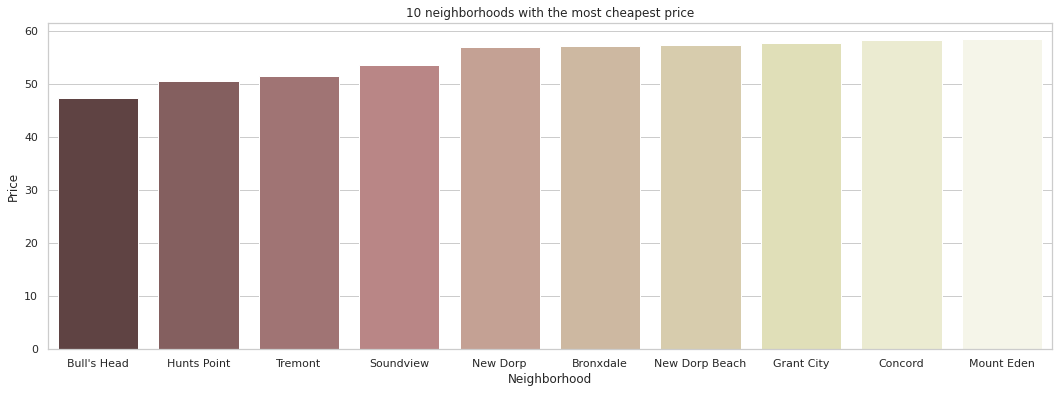

In [ ]:
low_10_neighborhood_price_df = neighborhood_price[:10]

low_10_neighborhood_plot = sns.barplot(x='neighbourhood', y='price', data=low_10_neighborhood_price_df, palette='pink')
low_10_neighborhood_plot.set_title('10 neighborhoods with the most cheapest price')
low_10_neighborhood_plot.set_ylabel('Price')
low_10_neighborhood_plot.set_xlabel('Neighborhood')

## 2.4 Learn about __room type__
### 2.4.1 how many listings are there for each room type?


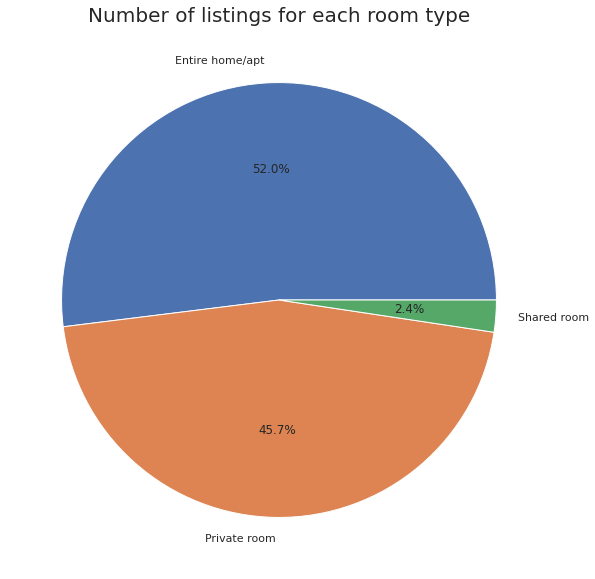

In [ ]:
labels = data.room_type.value_counts().index
sizes = data.room_type.value_counts().values
plt.figure(0, figsize= (10, 10))
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Number of listings for each room type', fontsize=20)
plt.show()

### 2.4.2 What's average price for each room type?

Text(0.5, 0, 'Room type')

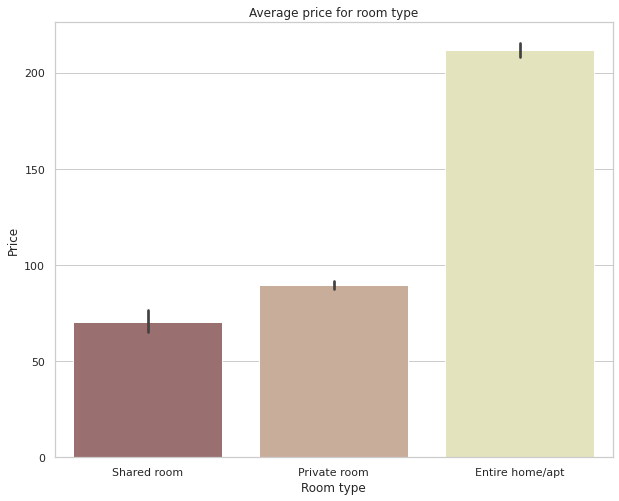

In [ ]:
sns.set(rc={'figure.figsize': (10, 8)})
sns.set_style('whitegrid')
room_price = data.groupby(['room_type'])['price'].aggregate(np.mean).reset_index().sort_values('price')
room_price_plot = sns.barplot(x='room_type', y='price', data=data, order=room_price['room_type'], palette='pink')
room_price_plot.set_title('Average price for room type')
room_price_plot.set_ylabel('Price')
room_price_plot.set_xlabel('Room type')

### 2.4.3 What about room types by area?

Text(0.5, 0, 'Room type')

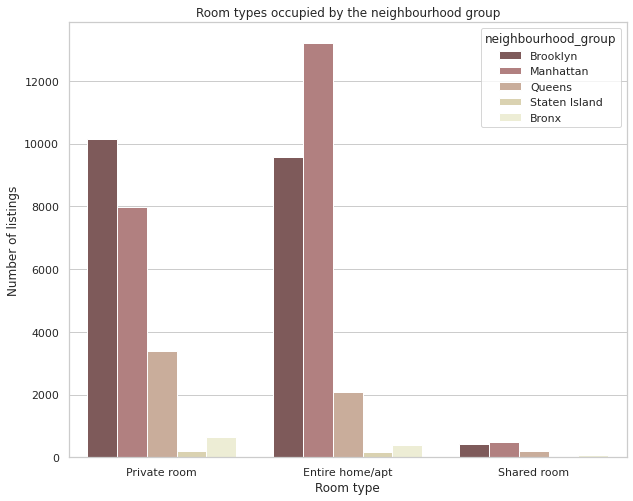

In [ ]:
room_type_neighborhood = sns.countplot(x='room_type', hue='neighbourhood_group', data=data, palette='pink')
room_type_neighborhood.set_title('Room types occupied by the neighbourhood group')
room_type_neighborhood.set_ylabel('Number of listings')
room_type_neighborhood.set_xlabel('Room type')

## 2.5 Learn closely about __price__
### 2.5.1 Price distribution of Manhattan

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


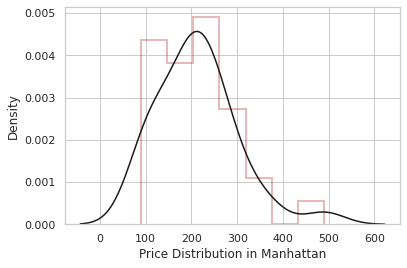

In [ ]:
sns.set(rc={'figure.figsize': (6, 4)})
sns.set_style('whitegrid')
price_manhattan = data[data.neighbourhood_group == 'Manhattan'][['neighbourhood', 'price']].groupby('neighbourhood').mean()
price_manhattan_dist = sns.distplot(price_manhattan, color='r', axlabel='Price Distribution in Manhattan', kde_kws={'color': 'k'}, hist_kws={'histtype': 'step', 'linewidth': 2})

### 2.5.2 Price distributiion of Brooklyn

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


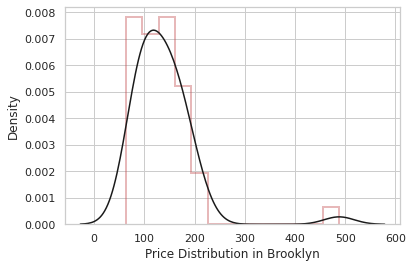

In [ ]:
price_brooklyn = data[data.neighbourhood_group == 'Brooklyn'][['neighbourhood', 'price']].groupby('neighbourhood').mean()
price_brooklyn_dist = sns.distplot(price_brooklyn, color='r', axlabel='Price Distribution in Brooklyn', kde_kws={'color': 'k'}, hist_kws={'histtype': 'step', 'linewidth': 2})

### 2.5.3 Price distributtion of Queens

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


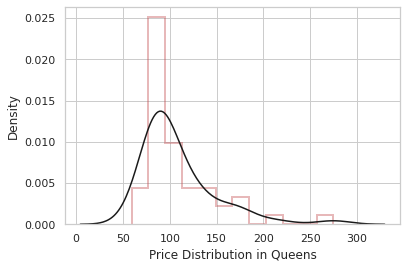

In [ ]:
price_queens = data[data.neighbourhood_group == 'Queens'][['neighbourhood', 'price']].groupby('neighbourhood').mean()
price_queens_dist = sns.distplot(price_queens, color='r', axlabel='Price Distribution in Queens', kde_kws={'color': 'k'}, hist_kws={'histtype': 'step', 'linewidth': 2})

### 2.5.4 Price distribution of Staten Island

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


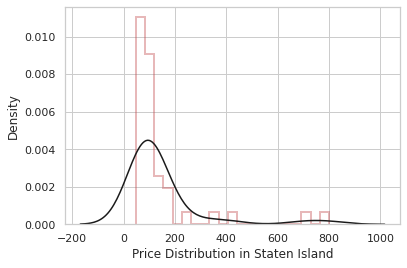

In [ ]:
price_staten_island = data[data.neighbourhood_group == 'Staten Island'][['neighbourhood', 'price']].groupby('neighbourhood').mean()
price_staten_island_dist = sns.distplot(price_staten_island, color='r', axlabel='Price Distribution in Staten Island', kde_kws={'color': 'k'}, hist_kws={'histtype': 'step', 'linewidth': 2})

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


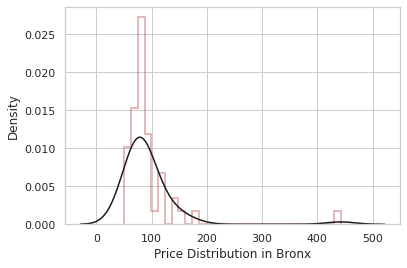

In [ ]:
price_bronx = data[data.neighbourhood_group == 'Bronx'][['neighbourhood', 'price']].groupby('neighbourhood').mean()
price_bronx_dist = sns.distplot(price_bronx, color='r', axlabel='Price Distribution in Bronx', kde_kws={'color': 'k'}, hist_kws={'histtype': 'step', 'linewidth': 2})

## 2.5 Geographic Analysis
### 2.5.1 Neighborhood group 

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


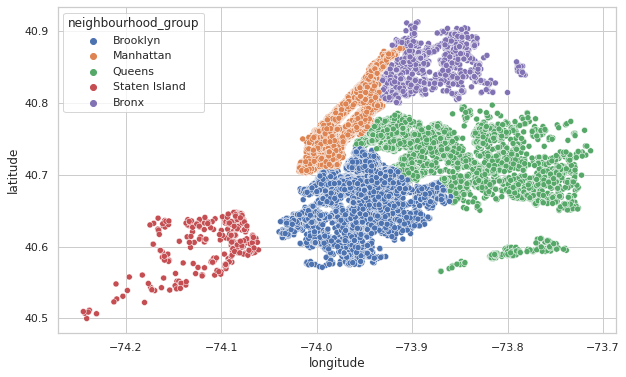

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(data.longitude,data.latitude,hue=data.neighbourhood_group)
plt.ioff()

### 2.5.2 Price on map 
Manhattan region has more expensive apartments

<Figure size 720x432 with 0 Axes>

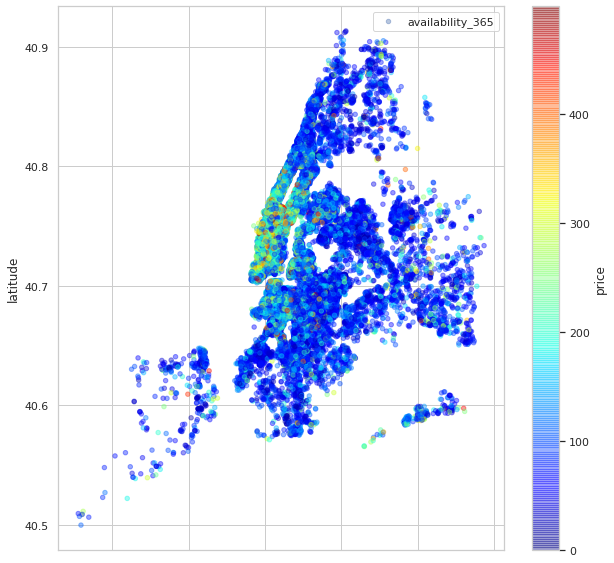

In [ ]:
plt.figure(figsize=(10,6));
price_for_map=data[data.price<500];
price_map=price_for_map.plot(kind='scatter', x='longitude',y='latitude',label='availability_365',c='price',cmap=plt.get_cmap('jet'),colorbar=True,alpha=0.4,figsize=(10,10));
price_map.legend();
plt.ioff()

### 2.5.3 Availability on map 
More room available throughout the year, we can expect higher possibiliity of getting cheaper  

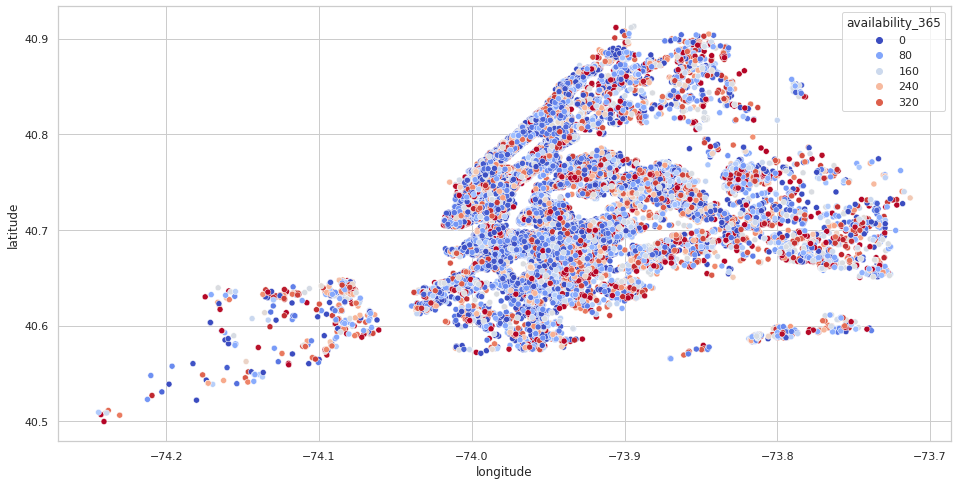

In [ ]:
f,ax = plt.subplots(figsize=(16,8))
ax = sns.scatterplot(y=data.latitude,x=data.longitude,hue=data.availability_365,palette="coolwarm")
plt.show()

### 2.5.4 Room type on map

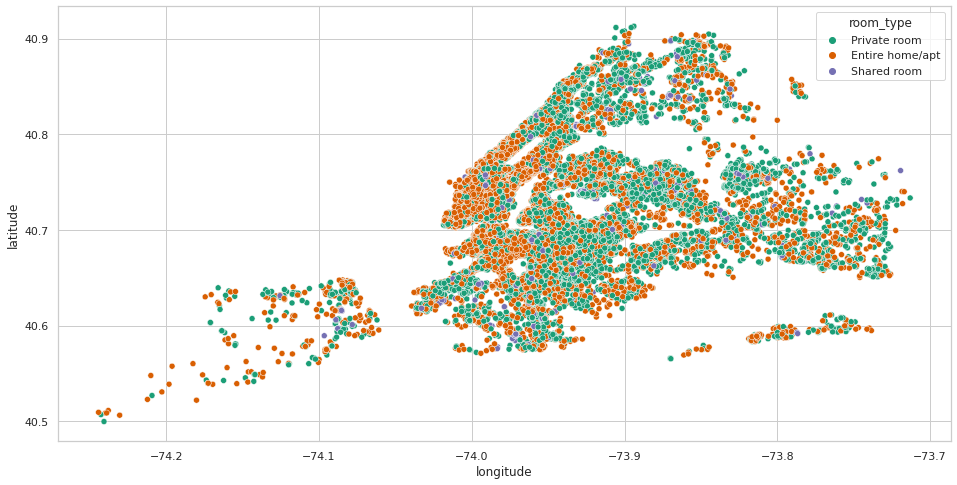

In [ ]:
f,ax = plt.subplots(figsize=(16,8))
ax = sns.scatterplot(y=data.latitude,x=data.longitude,hue=data.room_type, palette="Dark2")
plt.show()